In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
columns_BankDetail = ['用户id', '时间戳', '交易类型', '交易金额', '工资收入标记']
df_bank_detail_train = pd.read_table("./bank_detail_train.txt", names = columns_BankDetail, sep = ',')
df_bank_detail_train.head()

,用户id,时间戳,交易类型,交易金额,工资收入标记
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [5]:
df_bank_detail_train.info()
# 查看缺失情况
df_bank_detail_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6070197 entries, 0 to 6070196
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   用户id    int64  
 1   时间戳     int64  
 2   交易类型    int64  
 3   交易金额    float64
 4   工资收入标记  int64  
dtypes: float64(1), int64(4)
memory usage: 231.6 MB


用户id      0
时间戳       0
交易类型      0
交易金额      0
工资收入标记    0
dtype: int64

In [6]:
len(df_bank_detail_train.用户id)  # 查看银行账单总记录数
len(set(df_bank_detail_train.用户id)) # 查看银行账单总用户数

6070197

9294

In [7]:
# 导入其它五张训练集的表
columns_UserInfo = ['用户id','性别','职业','教育程度','婚姻状态','户口类型']
columns_BillDetail = ['用户id','账单时间戳','银行id','上期账单金额','上期还款金额','信用卡额度','本期账单余额','本期账单最低还款额','消费笔数','本期账单金额','调整金额','循环利息','可用金额','预借现金额度','还款状态']
columns_BrowseHistory = ['用户id','时间戳','浏览行为数据','浏览子行为编号']
columns_LoanTime= ['用户id','放款时间']
columns_overdue = ['用户id','样本标签']
df_UserInfo_train = pd.read_table("./user_info_train.txt",names = columns_UserInfo, sep = ',')
df_overdue_train = pd.read_table("./overdue_train.txt", names = columns_overdue, sep = ',')
df_BillDetail_train = pd.read_table("./bill_detail_train.txt", names = columns_BillDetail, sep = ',')
df_BrowseHistory_train = pd.read_table("./browse_history_train.txt", names = columns_BrowseHistory, sep = ',')
df_LoanTime_train = pd.read_table("./loan_time_train.txt", names = columns_LoanTime, sep = ',')

In [7]:
df_UserInfo_train.info()
df_UserInfo_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 6 columns):
用户id    55596 non-null int64
性别      55596 non-null int64
职业      55596 non-null int64
教育程度    55596 non-null int64
婚姻状态    55596 non-null int64
户口类型    55596 non-null int64
dtypes: int64(6)
memory usage: 2.5 MB


,用户id,性别,职业,教育程度,婚姻状态,户口类型
0,3150,1,2,4,1,4
1,6965,1,2,4,3,2
2,1265,1,3,4,3,1
3,6360,1,2,4,3,2
4,2583,2,2,2,1,1


In [8]:
df_overdue_train.info()
df_overdue_train.isnull().sum()
df_overdue_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 2 columns):
用户id    55596 non-null int64
样本标签    55596 non-null int64
dtypes: int64(2)
memory usage: 868.8 KB


用户id    0
样本标签    0
dtype: int64

,用户id,样本标签
0,1,0
1,2,0
2,3,0
3,4,1
4,5,0


In [9]:
df_BillDetail_train.info()
df_BillDetail_train.isnull().sum()
df_BillDetail_train.head()
len(df_BillDetail_train.用户id)
len(df_BillDetail_train.用户id.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2338118 entries, 0 to 2338117
Data columns (total 15 columns):
用户id         int64
账单时间戳        int64
银行id         int64
上期账单金额       float64
上期还款金额       float64
信用卡额度        float64
本期账单余额       float64
本期账单最低还款额    float64
消费笔数         int64
本期账单金额       float64
调整金额         float64
循环利息         float64
可用金额         float64
预借现金额度       float64
还款状态         int64
dtypes: float64(10), int64(5)
memory usage: 267.6 MB


用户id         0
账单时间戳        0
银行id         0
上期账单金额       0
上期还款金额       0
信用卡额度        0
本期账单余额       0
本期账单最低还款额    0
消费笔数         0
本期账单金额       0
调整金额         0
循环利息         0
可用金额         0
预借现金额度       0
还款状态         0
dtype: int64

,用户id,账单时间戳,银行id,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用金额,预借现金额度,还款状态
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


2338118

53174

In [10]:
df_BrowseHistory_train.info()
df_BrowseHistory_train.isnull().sum()
df_BrowseHistory_train.head()
len(df_BrowseHistory_train.用户id.unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22919547 entries, 0 to 22919546
Data columns (total 4 columns):
用户id       int64
时间戳        int64
浏览行为数据     int64
浏览子行为编号    int64
dtypes: int64(4)
memory usage: 699.4 MB


用户id       0
时间戳        0
浏览行为数据     0
浏览子行为编号    0
dtype: int64

,用户id,时间戳,浏览行为数据,浏览子行为编号
0,34801,5926003545,173,1
1,34801,5926003545,164,4
2,34801,5926003545,38,7
3,34801,5926003545,45,1
4,34801,5926003545,110,7


47330

In [11]:
df_LoanTime_train.info()
df_LoanTime_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55596 entries, 0 to 55595
Data columns (total 2 columns):
用户id    55596 non-null int64
放款时间    55596 non-null int64
dtypes: int64(2)
memory usage: 868.8 KB


,用户id,放款时间
0,1,5914855887
1,2,5914855887
2,3,5914855887
3,4,5914855887
4,5,5914855887


In [12]:
print( {  'userinfo表的用户id数':len(df_UserInfo_train.用户id.unique()), 
          'bank_detail表的用户id数':len(df_bank_detail_train.用户id.unique()),
          'overdue表的用户id数':len(df_overdue_train.用户id.unique()),
          'bill_detail表的用户id数':len(df_BillDetail_train.用户id.unique()),
          'browse_history表的用户id数':len(df_BrowseHistory_train.用户id.unique()),
          'loan_time表的用户id数':len(df_LoanTime_train.用户id.unique())})
    

{'userinfo表的用户id数': 55596, 'bank_detail表的用户id数': 9294, 'overdue表的用户id数': 55596, 'bill_detail表的用户id数': 53174, 'browse_history表的用户id数': 47330, 'loan_time表的用户id数': 55596}


In [8]:
df = pd.merge(left=df_bank_detail_train, right=df_LoanTime_train, how='left', on='用户id')
t=df[df.时间戳<=df.放款时间]
bank_detail = t[['用户id']]
bank_detail = bank_detail.drop_duplicates(subset='用户id',keep='first')
bank_detail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9271 entries, 0 to 6069672
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   用户id    9271 non-null   int64
dtypes: int64(1)
memory usage: 144.9 KB


In [9]:
df1=pd.merge(left=df_BillDetail_train, right=df_LoanTime_train, how='left', on='用户id')
df1.head()
t1=df1[df1.账单时间戳<=df1.放款时间]
bill_detail = t1[['用户id']]
bill_detail = bill_detail.drop_duplicates(subset='用户id',keep='first')
bill_detail.info()

,用户id,账单时间戳,银行id,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用金额,预借现金额度,还款状态,放款时间
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0,5919867087
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0,5919867087
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0,5919867087
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0,5919867087
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0,5919867087


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46739 entries, 0 to 2338115
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   用户id    46739 non-null  int64
dtypes: int64(1)
memory usage: 730.3 KB


In [10]:
df2=pd.merge(left=df_BrowseHistory_train, right=df_LoanTime_train, how='left', on='用户id')
df2.columns
t2=df2[df2.时间戳<=df2.放款时间]
browse_history = t2[['用户id']]
browse_history = browse_history.drop_duplicates(subset='用户id',keep='first')
browse_history.info()

Index(['用户id', '时间戳', '浏览行为数据', '浏览子行为编号', '放款时间'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44945 entries, 0 to 22919430
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   用户id    44945 non-null  int64
dtypes: int64(1)
memory usage: 702.3 KB


In [11]:
user1=pd.merge(left=bill_detail, right=browse_history, how='inner', on='用户id')
user2=pd.merge(left=user1, right=bank_detail, how='inner', on='用户id')
user2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   用户id    5735 non-null   int64
dtypes: int64(1)
memory usage: 89.6 KB


In [15]:
user.T

,0,1,2,3,4,5,6,7,8,9,...,5725,5726,5727,5728,5729,5730,5731,5732,5733,5734
用户id,6965,1265,2583,29165,2443,590,10313,55354,20235,694,...,11532,13999,40491,23264,6949,52736,45989,18855,37530,8917


得到5735个完整记录，然后通过这5735个id筛选每张表的记录，进行字段预处理。

# 数据清洗

## 银行账单表

In [23]:
bank_detail_select = pd.merge(left=df_bank_detail_train, right=user2, how='inner', on='用户id')

In [24]:
bank_detail_select.columns

Index(['用户id', '时间戳', '交易类型', '交易金额', '工资收入标记'], dtype='object')

In [25]:
bank_detail_select.head(
)

,用户id,时间戳,交易类型,交易金额,工资收入标记
0,6965,5894316387,0,13.756664,0
1,6965,5894321388,1,13.756664,0
2,6965,5897553564,0,14.449810,0
3,6965,5897563463,1,10.527763,0
4,6965,5897564598,1,13.651303,0


In [26]:
b1=bank_detail_select[(bank_detail_select['交易类型']==0)].groupby(['用户id'], as_index=False)
b2=bank_detail_select[(bank_detail_select['交易类型']==1)].groupby(['用户id'], as_index=False)
b3=bank_detail_select[(bank_detail_select['工资收入标记']==1)].groupby(['用户id'], as_index=False)

In [27]:
b1

In [32]:
c1=b1['交易金额'].agg({'进账单数':'count','进账金额':'sum'}) # 统计用户进账单数，求和
c2=b2['交易金额'].agg({'支出单数':'count','支出金额':'sum'}) # 统计用户支出单数，求和
c3=b3['交易金额'].agg({'工资笔数':'count','工资收入':'sum'}) # 统计用户工资收入计数，求和
c1.head()
c2.head()
c3.head()

,用户id,进账单数,进账金额
0,3,172,2278.873446
1,4,96,1164.342384
2,10,141,1793.642133
3,14,521,6856.993313
4,16,35,478.264186


,用户id,支出单数,支出金额
0,3,507,4985.957607
1,4,195,2129.425722
2,10,183,2250.292530
3,14,729,7960.811363
4,16,75,935.201357


,用户id,工资笔数,工资收入
0,67,7,85.972926
1,117,17,146.429384
2,119,17,246.778621
3,178,14,207.186980
4,189,7,107.501477


In [33]:
d1=pd.merge(left=user2, right=c1, how='left', on='用户id') # 匹配最终分析的user2个客户收入情况
d1=d1.fillna(0)
d1.info()
d2=pd.merge(left=user2, right=c2, how='left', on='用户id')
d2=d2.fillna(0)
d2.info()
d3=pd.merge(left=user2, right=c3, how='left', on='用户id')
d3=d3.fillna(0)
d3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户id    5735 non-null   int64  
 1   进账单数    5735 non-null   float64
 2   进账金额    5735 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 179.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户id    5735 non-null   int64  
 1   支出单数    5735 non-null   float64
 2   支出金额    5735 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 179.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   用户id    5735 non-null   int64  
 1   工资笔数    5735 non-null   float64
 2   工资收入    5735 non-null   float64
dtypes: float64(2), int

In [34]:
bank_train=d1.merge(d2)
bank_train=bank_train.merge(d3)
bank_train.head()

,用户id,进账单数,进账金额,支出单数,支出金额,工资笔数,工资收入
0,6965,75.0,972.850228,289.0,3234.531975,0.0,0.000000
1,1265,125.0,1708.206195,294.0,3662.457063,0.0,0.000000
2,2583,213.0,2736.475318,618.0,7064.310678,0.0,0.000000
3,29165,189.0,2277.607807,473.0,5099.861165,14.0,202.630532
4,2443,252.0,3020.288782,341.0,3762.790364,0.0,0.000000


## 浏览表

先剔除5735以外的数据，再统计每个用户的浏览记录（count）

In [35]:
browse_history_select=pd.merge(left=user2, right=df_BrowseHistory_train, how='left', on='用户id')
g1=browse_history_select.groupby(['用户id'], as_index=False)
g1.head()

,用户id,时间戳,浏览行为数据,浏览子行为编号
0,6965,5891711961,201,1
1,6965,5891711898,201,1
2,6965,5891711898,50,6
3,6965,5891711898,173,1
4,6965,5891711898,164,4
...,...,...,...,...
3899703,8917,5924543657,110,7
3899704,8917,5924543657,173,1
3899705,8917,5924543657,101,1
3899706,8917,5924543657,118,1


In [36]:
h1=g1['浏览行为数据'].agg({'浏览行为数据':'count'})
browse_train=pd.merge(left=user2, right=h1, how='inner', on='用户id')
browse_train.head()

,用户id,浏览行为数据
0,6965,1710
1,1265,420
2,2583,702
3,29165,783
4,2443,671


## 账单表:

去掉了时间、银行id、还款状态这几个变量，按用户id分组后对每个字段均值化处理

In [37]:
df_BillDetail_train.columns
df_BillDetail_train.head()

Index(['用户id', '账单时间戳', '银行id', '上期账单金额', '上期还款金额', '信用卡额度', '本期账单余额',
       '本期账单最低还款额', '消费笔数', '本期账单金额', '调整金额', '循环利息', '可用金额', '预借现金额度',
       '还款状态'],
      dtype='object')

,用户id,账单时间戳,银行id,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用金额,预借现金额度,还款状态
0,3150,5906744363,6,18.626118,18.661937,20.664418,18.905766,17.847133,1,0.0,0.0,0.0,0.0,19.971271,0
1,3150,5906744401,6,18.905766,18.909954,20.664418,19.113305,17.911506,1,0.0,0.0,0.0,0.0,19.971271,0
2,3150,5906744427,6,19.113305,19.150290,20.664418,19.300194,17.977610,1,0.0,0.0,0.0,0.0,19.971271,0
3,3150,5906744515,6,19.300194,19.300280,21.000890,20.303240,18.477177,1,0.0,0.0,0.0,0.0,20.307743,0
4,3150,5906744562,6,20.303240,20.307744,21.000890,20.357134,18.510985,1,0.0,0.0,0.0,0.0,20.307743,0


In [38]:
bill_select=pd.merge(left=user2, right=df_BillDetail_train, how='right', on='用户id')
bill_select.drop(['账单时间戳','银行id','还款状态'], axis=1, inplace=True)
e1=bill_select.groupby(['用户id'], as_index=False)
f1=e1['上期账单金额', '上期还款金额', '信用卡额度', '本期账单余额','本期账单最低还款额', '消费笔数', '本期账单金额', '调整金额', '循环利息', '可用金额', '预借现金额度'].agg(np.mean)
bill_train = pd.merge(left=user2, right=f1, how='left', on='用户id')
bill_train.head()

/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,用户id,上期账单金额,上期还款金额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用金额,预借现金额度
0,6965,10.002659,12.733206,19.971271,19.957631,17.220095,10.750000,18.825107,0.000000,15.520681,0.0,19.624697
1,1265,17.715686,14.191595,19.973385,19.909123,17.866453,1.444444,19.007284,0.000000,5.175483,0.0,9.702118
2,2583,15.192264,15.265601,18.307126,17.736937,10.292788,1.791667,17.199134,0.000000,6.478271,0.0,11.014650
3,29165,-6.973236,12.852082,19.740221,17.921520,15.902257,0.000000,12.969975,0.000000,0.000000,0.0,6.001719
4,2443,16.759482,4.151986,17.309158,19.397134,18.206423,2.251572,15.892834,0.229931,4.082358,0.0,10.873986


(4) 逾期表,用户表：

In [39]:
overdue_train=pd.merge(left=df_overdue_train,right=user2, how='right', on='用户id')
user_train=pd.merge(left=user2, right=df_UserInfo_train, how='left', on='用户id')
overdue_train.head()
user_train.head()

,用户id,样本标签
0,6965,0
1,1265,0
2,2583,0
3,29165,0
4,2443,0


,用户id,性别,职业,教育程度,婚姻状态,户口类型
0,6965,1,2,4,3,2
1,1265,1,3,4,3,1
2,2583,2,2,2,1,1
3,29165,1,2,4,1,4
4,2443,1,4,4,3,1


In [40]:
df_train=user_train.merge(bank_train)
df_train=df_train.merge(bill_train)
df_train=df_train.merge(browse_train)
df_train=df_train.merge(overdue_train)
df_train.head()

,用户id,性别,职业,教育程度,婚姻状态,户口类型,进账单数,进账金额,支出单数,支出金额,...,本期账单余额,本期账单最低还款额,消费笔数,本期账单金额,调整金额,循环利息,可用金额,预借现金额度,浏览行为数据,样本标签
0,6965,1,2,4,3,2,75.0,972.850228,289.0,3234.531975,...,19.957631,17.220095,10.750000,18.825107,0.000000,15.520681,0.0,19.624697,1710,0
1,1265,1,3,4,3,1,125.0,1708.206195,294.0,3662.457063,...,19.909123,17.866453,1.444444,19.007284,0.000000,5.175483,0.0,9.702118,420,0
2,2583,2,2,2,1,1,213.0,2736.475318,618.0,7064.310678,...,17.736937,10.292788,1.791667,17.199134,0.000000,6.478271,0.0,11.014650,702,0
3,29165,1,2,4,1,4,189.0,2277.607807,473.0,5099.861165,...,17.921520,15.902257,0.000000,12.969975,0.000000,0.000000,0.0,6.001719,783,0
4,2443,1,4,4,3,1,252.0,3020.288782,341.0,3762.790364,...,19.397134,18.206423,2.251572,15.892834,0.229931,4.082358,0.0,10.873986,671,0


In [41]:
df_train.columns

Index(['用户id', '性别', '职业', '教育程度', '婚姻状态', '户口类型', '进账单数', '进账金额', '支出单数',
       '支出金额', '工资笔数', '工资收入', '上期账单金额', '上期还款金额', '信用卡额度', '本期账单余额',
       '本期账单最低还款额', '消费笔数', '本期账单金额', '调整金额', '循环利息', '可用金额', '预借现金额度',
       '浏览行为数据', '样本标签'],
      dtype='object')

In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   用户id       5735 non-null   int64  
 1   性别         5735 non-null   int64  
 2   职业         5735 non-null   int64  
 3   教育程度       5735 non-null   int64  
 4   婚姻状态       5735 non-null   int64  
 5   户口类型       5735 non-null   int64  
 6   进账单数       5735 non-null   float64
 7   进账金额       5735 non-null   float64
 8   支出单数       5735 non-null   float64
 9   支出金额       5735 non-null   float64
 10  工资笔数       5735 non-null   float64
 11  工资收入       5735 non-null   float64
 12  上期账单金额     5735 non-null   float64
 13  上期还款金额     5735 non-null   float64
 14  信用卡额度      5735 non-null   float64
 15  本期账单余额     5735 non-null   float64
 16  本期账单最低还款额  5735 non-null   float64
 17  消费笔数       5735 non-null   float64
 18  本期账单金额     5735 non-null   float64
 19  调整金额       5735 non-null   float64
 20  循环利息    

# 特征工程

## 基于业务理解的筛选

主要看相关性

In [31]:
bank_train.columns

Index(['用户id', '进账单数', '进账金额', '支出单数', '支出金额', '工资笔数', '工资收入'], dtype='object')

In [32]:
sns.heatmap?

In [45]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams["axes.unicode_minus"] = False

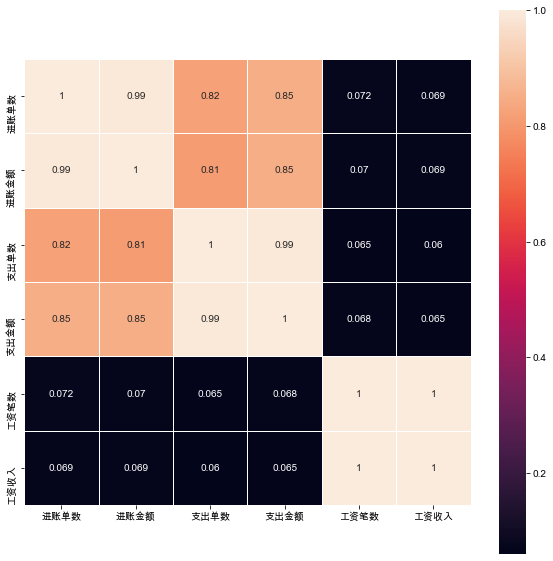

In [47]:
import matplotlib.pyplot as plt
internal_chars=['进账单数', '进账金额', '支出单数', '支出金额', '工资笔数', '工资收入']
corrmat=bank_train[internal_chars].corr()   # 相关性结果数据表
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True); #热力图

- '进账单数'与'进账金额'的相关系数很高,相关系数为0.99
- '支出单数', '支出金额'的相关性较高，相关系数分别为0.82,0.85
- '进账金额'与'支出单数', '支出金额'的相关性较高，相关系数分别为0.81,0.85
- '支出单数'与 '支出金额'的相关性很高，相关系数为0.99
- '工资笔数'与'工资收入'相关系数为1

- 可见收入、支出、工资三个指标的金额跟笔数是线性关系，那么后续将构建一个新的特征：笔均=金额/笔数，取工资笔均；而且收入、支出是强相关（0.82），所以只取一个即可，支出笔均。

- 后续将用'进账金额/进账单数','支出金额/支出单数','工资收入/工资笔数'得到'进账笔均','支出笔均','工资笔均'

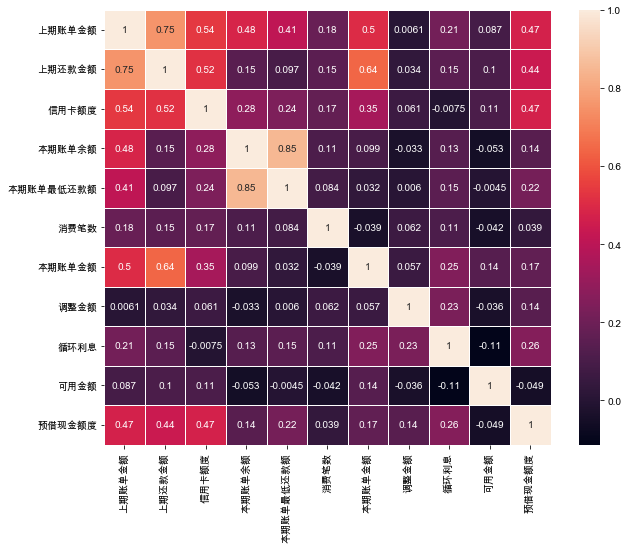

In [48]:
internal_chars=['上期账单金额', '上期还款金额', '信用卡额度', '本期账单余额',
                '本期账单最低还款额', '消费笔数', '本期账单金额', '调整金额',
                '循环利息', '可用金额', '预借现金额度']
corrmat=df_train[internal_chars].corr()   # 相关性结果数据表
plt.subplots(figsize=(10,8))
plt.xticks(rotation='0')
sns.heatmap(corrmat, square=False, linewidths=.5, annot=True);  # 热力图

- '本期账单金额'与'本期账单余额'相关系数为0.85
- '上期账单金额'与'上期还款金额'相关系数为0.75
- '本期账单金额'与'上期还款金额'相关系数为0.64
- '信用卡额度'与'上期账单金额'和'上期还款金额'相关系数分别为0.54和0.52
- '本期账单金额'与'上期账单金额'相关系数为0.5

In [35]:
# 上期还款差额 =上期账单金额 - 上期还款金额， 上期还款差额还会直接影响用户的信用额度以及本期的账单金额。

# 本期的账单余额与最低还款额具有高度共线性，决定只选用最低还款额。

# 另外调整金额和循环利息是跟“上期的还款差额”有关的：

# 还款差额>0，需要计算循环利息，调整金额不计

# 还款差额<0，需要计算调整金额，循环利息不计

# 所以可以将还款差额进行“特征二值化”来代替这两个特征。

# 预借现金额度，是指持卡人使用信用卡通过ATM等自助终端提取现金的最高额度，
# 取现额度包含于信用额度之内，一般是信用额度的50%左右，所以可以不用这个特征，
# 选择信用额度即可。

- 重新构建数据表

In [49]:
df_train['平均支出']=df_train.apply(lambda x:x.支出金额/x.支出单数, axis=1) # apply() 当函数的参数存在于字典或元组中时
# df_train['平均进账']=df_train.apply(lambda x:x.进账金额/x.进账单数, axis=1) 
df_train['平均工资收入']=df_train.apply(lambda x:x.工资收入/x.工资笔数, axis=1)
df_train['上期还款差额']=df_train.apply(lambda x:x.上期账单金额-x.上期还款金额, axis=1)
df_select=df_train.loc[:,['用户id', '性别', '教育程度', '婚姻状态', '平均支出',
                          '平均工资收入', '上期还款差额', '信用卡额度', '本期账单余额', '本期账单最低还款额', 
                          '消费笔数',  '浏览行为数据', '样本标签']].fillna(0)
df_select.head()

/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """Entry point for launching an IPython kernel.
/Users/jim/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,用户id,性别,教育程度,婚姻状态,平均支出,平均工资收入,上期还款差额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,浏览行为数据,样本标签
0,6965,1,4,3,11.192152,0.000000,-2.730547,19.971271,19.957631,17.220095,10.750000,1710,0
1,1265,1,4,3,12.457337,0.000000,3.524092,19.973385,19.909123,17.866453,1.444444,420,0
2,2583,2,2,1,11.430923,0.000000,-0.073337,18.307126,17.736937,10.292788,1.791667,702,0
3,29165,1,4,1,10.781947,14.473609,-19.825318,19.740221,17.921520,15.902257,0.000000,783,0
4,2443,1,4,3,11.034576,0.000000,12.607495,17.309158,19.397134,18.206423,2.251572,671,0


## 基于机器学习的筛选

In [50]:
# 将上期还款差额二值化
from sklearn.preprocessing import Binarizer
X=df_select['上期还款差额'].values.reshape(-1,1)
transformer = Binarizer(threshold=0).fit_transform(X)
df_select['上期还款差额标签']=transformer

Filter法筛选

### 方差过滤法

In [52]:
df_select.head()

,用户id,性别,教育程度,婚姻状态,平均支出,平均工资收入,上期还款差额,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,浏览行为数据,样本标签,上期还款差额标签
0,6965,1,4,3,11.192152,0.000000,-2.730547,19.971271,19.957631,17.220095,10.750000,1710,0,0.0
1,1265,1,4,3,12.457337,0.000000,3.524092,19.973385,19.909123,17.866453,1.444444,420,0,1.0
2,2583,2,2,1,11.430923,0.000000,-0.073337,18.307126,17.736937,10.292788,1.791667,702,0,0.0
3,29165,1,4,1,10.781947,14.473609,-19.825318,19.740221,17.921520,15.902257,0.000000,783,0,0.0
4,2443,1,4,3,11.034576,0.000000,12.607495,17.309158,19.397134,18.206423,2.251572,671,0,1.0


In [53]:
x=df_select.drop(['用户id','上期还款差额','样本标签'],axis=1)
x.shape

(5735, 11)

In [54]:
y=df_select['样本标签']

In [55]:
from sklearn.feature_selection import VarianceThreshold
VTS = VarianceThreshold()   # 实例化，不清楚参数默认方差为0
x_01=VTS.fit_transform(x)

In [57]:
x_01

array([[1.00000000e+00, 4.00000000e+00, 3.00000000e+00, ...,
        1.07500000e+01, 1.71000000e+03, 0.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 3.00000000e+00, ...,
        1.44444444e+00, 4.20000000e+02, 1.00000000e+00],
       [2.00000000e+00, 2.00000000e+00, 1.00000000e+00, ...,
        1.79166667e+00, 7.02000000e+02, 0.00000000e+00],
       ...,
       [1.00000000e+00, 4.00000000e+00, 1.00000000e+00, ...,
        7.69230769e-02, 3.60000000e+02, 1.00000000e+00],
       [1.00000000e+00, 4.00000000e+00, 1.00000000e+00, ...,
        2.22000000e+00, 5.00000000e+02, 1.00000000e+00],
       [1.00000000e+00, 3.00000000e+00, 1.00000000e+00, ...,
        7.82608696e-01, 4.26000000e+02, 0.00000000e+00]])

In [43]:
x

,性别,教育程度,婚姻状态,平均支出,平均工资收入,信用卡额度,本期账单余额,本期账单最低还款额,消费笔数,浏览行为数据,上期还款差额标签
0,1,4,3,11.192152,0.000000,19.971271,19.957631,17.220095,10.750000,1710,0.0
1,1,4,3,12.457337,0.000000,19.973385,19.909123,17.866453,1.444444,420,1.0
2,2,2,1,11.430923,0.000000,18.307126,17.736937,10.292788,1.791667,702,0.0
3,1,4,1,10.781947,14.473609,19.740221,17.921520,15.902257,0.000000,783,0.0
4,1,4,3,11.034576,0.000000,17.309158,19.397134,18.206423,2.251572,671,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5730,0,4,3,10.731462,14.570604,10.888560,18.910376,17.218990,0.142857,904,0.0
5731,1,2,1,10.599708,0.000000,20.253273,19.517978,18.033096,1.200000,24,1.0
5732,1,4,1,11.415696,0.000000,10.160731,17.287080,16.319912,0.076923,360,1.0
5733,1,4,1,10.451863,0.000000,19.496280,19.494289,17.432715,2.220000,500,1.0


### 相关性过滤

- 互信息法

In [44]:
DTC?

Object `DTC` not found.


In [45]:
cvs?

Object `cvs` not found.


In [46]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(x,y)
result
k = result.shape[0] - sum(result <= 0.001)
k

array([0.01044631, 0.00676775, 0.        , 0.0087247 , 0.00479937,
       0.01122191, 0.        , 0.00389996, 0.00581473, 0.01506769,
       0.00025675])

8

In [47]:
x.columns

Index(['性别', '教育程度', '婚姻状态', '平均支出', '平均工资收入', '信用卡额度', '本期账单余额', '本期账单最低还款额',
       '消费笔数', '浏览行为数据', '上期还款差额标签'],
      dtype='object')

- 用filter法的互信息法得到如下变量和逾期情况相关 
- 性别 教育程度 平均支出 平均工资收入 信用卡额度 本期账单最低还款额 消费笔数 浏览行为数据 上期还款差额标签

In [48]:
x1=x.drop(['本期账单余额','上期还款差额标签'], axis=1)

### embeded嵌入法

In [49]:
from sklearn.feature_selection import SelectFromModel


# 样本不均衡

In [50]:
y.value_counts()

0    4899
1     836
Name: 样本标签, dtype: int64

In [51]:
#from imblearn.over_sampling import SMOTE
#over_samples = SMOTE(random_state=111)
#over_samples_x1, over_samples_y = over_samples.fit_sample(x1,y)

In [52]:
# from imblearn.over_sampling import SMOTE
# over_samples = SMOTE(random_state=111)
# over_samples_x, over_samples_y = over_samples.fit_sample(x,y)

# 逻辑回归

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score as cvs

## 超参数的影响

- 下面使用互信息法筛选之前的变量

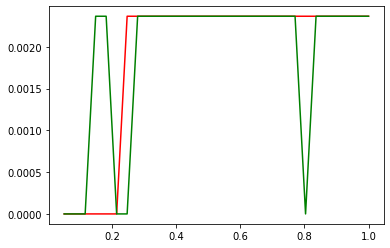

In [54]:
# 不用SMOTE算法
l1CVS=[]
l2CVS=[]
# 用学习曲线对参数C进行调整,分别在两个模型中进行调参
# C : 一般不会超过1, 越大惩罚力度越小, 从 0.05 - 2
for i in np.linspace(0.05,1,30):
    # 使用参数进行建模
    lrl1 = LogisticRegression(penalty='l1', solver='liblinear', C=i, max_iter=1000, random_state=0)
    lrl2 = LogisticRegression(penalty='l2', solver='liblinear', C=i, max_iter=1000, random_state=0)
    once1 = cvs(lrl1, x, y, cv=5, scoring='f1').mean()
    once2 = cvs(lrl2, x, y, cv=5, scoring='f1').mean()
    l1CVS.append(once1)
    l2CVS.append(once2)
    
plt.plot(np.linspace(0.05,1,30) ,l1CVS, "r")
plt.plot(np.linspace(0.05,1,30) ,l2CVS, 'g')
plt.show()    
    

- 下面使用互信息法筛选后的变量

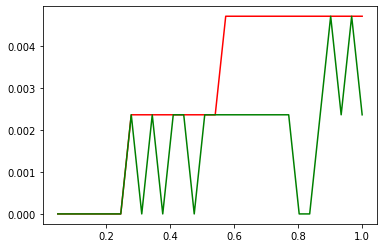

In [55]:
# 不用SMOTE算法
l1CVS=[]
l2CVS=[]
# 用学习曲线对参数C进行调整,分别在两个模型中进行调参
# C : 一般不会超过1, 越大惩罚力度越小, 从 0.05 - 2
for i in np.linspace(0.05,1,30):
    # 使用参数进行建模
    lrl1 = LogisticRegression(penalty='l1', solver='liblinear', C=i, max_iter=1000, random_state=000)
    lrl2 = LogisticRegression(penalty='l2', solver='liblinear', C=i, max_iter=1000, random_state=000)
    once1 = cvs(lrl1, x1, y, cv=5, scoring='f1').mean()
    once2 = cvs(lrl2, x1, y, cv=5, scoring='f1').mean()
    l1CVS.append(once1)
    l2CVS.append(once2)
    
plt.plot(np.linspace(0.05,1,30) ,l1CVS, "r")
plt.plot(np.linspace(0.05,1,30) ,l2CVS, 'g')
plt.show()    
    

In [56]:
# 包装法筛选变量

In [57]:
from sklearn.feature_selection import RFE
RFE?

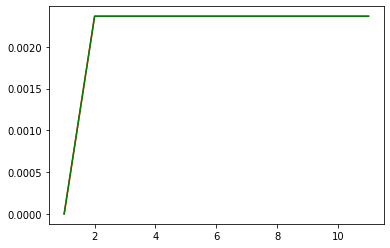

In [59]:
from sklearn.feature_selection import RFE
LR_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.6, max_iter=1000, random_state=0)
LR_2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.6, max_iter=1000, random_state=0)
score1=[]
score2=[]
for i in range(1,12,1):
    selector1 = RFE(LR_1, n_features_to_select=i, step=1)
    selector2 = RFE(LR_2, n_features_to_select=i, step=1)
    X_wrapper1 = selector1.fit_transform(x, y)
    X_wrapper2 = selector2.fit_transform(x, y)
    once1=cvs(LR_1, X_wrapper1, y, cv=5, scoring='f1').mean()
    once2=cvs(LR_2, X_wrapper2, y, cv=5, scoring='f1').mean()
    score1.append(once1)
    score2.append(once2)

plt.plot(range(1,12,1),score1, 'r')
plt.plot(range(1,12,1),score2, 'g')
plt.show()

In [ ]:
score1
score2

- 使用SMOTE算法后

In [60]:
from imblearn.over_sampling import SMOTE
over_samples = SMOTE(random_state=111)
over_samples_x, over_samples_y = over_samples.fit_sample(x,y)

In [ ]:
x1.columns

In [ ]:
# from imblearn.over_sampling import SMOTE
# over_samples = SMOTE(random_state=111)
# over_samples_x1, over_samples_y1 = over_samples.fit_sample(x1,y)

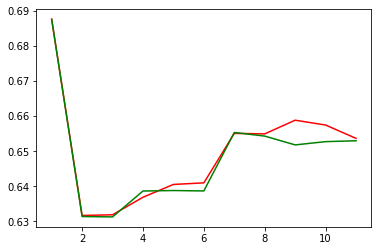

In [62]:
from sklearn.feature_selection import RFE
LR_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.6, max_iter=1000, random_state=0)
LR_2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.6, max_iter=1000, random_state=0)
score1=[]
score2=[]
for i in range(1,12,1):
    selector1 = RFE(LR_1, n_features_to_select=i, step=1)
    selector2 = RFE(LR_2, n_features_to_select=i, step=1)
    X_wrapper1 = selector1.fit_transform(over_samples_x, over_samples_y)
    X_wrapper2 = selector2.fit_transform(over_samples_x, over_samples_y)
    once1=cvs(LR_1, X_wrapper1, over_samples_y, cv=5, scoring='f1').mean()
    once2=cvs(LR_2, X_wrapper2, over_samples_y, cv=5, scoring='f1').mean()
    score1.append(once1)
    score2.append(once2)

plt.plot(range(1,12,1),score1, 'r')
plt.plot(range(1,12,1),score2, 'g')
plt.show()

In [ ]:
score1
score2

# 决策树

In [63]:
# 导入train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier as DTC

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=999)

In [103]:
# dtc=DTC(class_weight='balanced').fit(x_train, y_train, sample_weight='balanced')

In [102]:
# print(classification_report(y_train, dtc.predict(x_train)))
# print(classification_report(y_test, dtc.predict(x_test)))

In [ ]:
dtc=DTC(class_weight='balanced').fit

In [65]:
from imblearn.over_sampling import SMOTE
over_samples = SMOTE(random_state=111)
over_samples_x_train, over_samples_y_train = over_samples.fit_sample(x_train,y_train)
over_samples_x_test, over_samples_y_test = over_samples.fit_sample(x_test,y_test)

In [66]:
over_samples_y_train.value_counts()
over_samples_y_test.value_counts()

1    3445
0    3445
Name: 样本标签, dtype: int64

1    1454
0    1454
Name: 样本标签, dtype: int64

In [ ]:
# x1_train = x_train.drop(['本期账单余额','上期还款差额标签'], axis=1)
# x1_test = x_test.drop(['本期账单余额','上期还款差额标签'], axis=1)

In [ ]:
# x1_train.columns
# x1_test.columns
# y_train.value_counts()
# y_test.value_counts()

In [ ]:
dtc?

In [69]:
dtc=DTC(splitter='random', random_state=222).fit(over_samples_x_train, over_samples_y_train)
cvs(dtc, over_samples_x_train, over_samples_y_train, cv=10, scoring='f1').mean()
print(classification_report(y_test, dtc.predict(x_test)))
print(classification_report(over_samples_y_test, dtc.predict(over_samples_x_test)))
print(classification_report(over_samples_y_train, dtc.predict(over_samples_x_train)))

0.7777491677294854

              precision    recall  f1-score   support

           0       0.86      0.77      0.81      1454
           1       0.21      0.33      0.25       267

    accuracy                           0.70      1721
   macro avg       0.53      0.55      0.53      1721
weighted avg       0.76      0.70      0.73      1721

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1454
           1       0.74      0.64      0.69      1454

    accuracy                           0.71      2908
   macro avg       0.71      0.71      0.70      2908
weighted avg       0.71      0.71      0.70      2908

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3445
           1       1.00      1.00      1.00      3445

    accuracy                           1.00      6890
   macro avg       1.00      1.00      1.00      6890
weighted avg       1.00      1.00      1.00      6890



In [70]:
L_train=[]
L_test=[]
L_CVS=[]
for i in range(2,11):
    dtc = DTC(criterion='gini', random_state=11, splitter='best', max_depth=i,
             min_samples_leaf=10, min_samples_split=25)
    dtc.fit(over_samples_x_train, over_samples_y_train)
    once = cvs(dtc, over_samples_x_train,over_samples_y_train,cv=5, scoring='f1').mean()
    L_CVS.append(once)
    L_train.append(f1_score(over_samples_y_train,dtc.predict(over_samples_x_train)))
    L_test.append(f1_score(over_samples_y_test, dtc.predict(over_samples_x_test)))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=25,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=11, splitter='best')

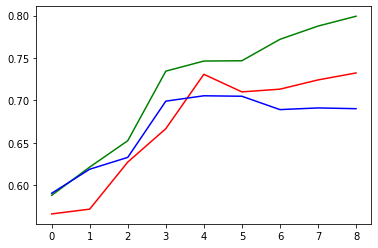

In [71]:
plt.plot(L_CVS, 'r')
plt.plot(L_train, 'g')
plt.plot(L_test, 'b')

In [72]:
# 最大深度选择5比较合适
dtc = DTC(criterion='gini', 
 #         random_state=11,
          splitter='best', max_depth=5,
             min_samples_leaf=10, min_samples_split=25).fit(over_samples_x_train, over_samples_y_train)
cvs(dtc, over_samples_x_train, over_samples_y_train, cv=5, scoring='f1').mean()
print(classification_report(y_test, dtc.predict(x_test)))
print(classification_report(over_samples_y_test, dtc.predict(over_samples_x_test)))
print(classification_report(over_samples_y_train, dtc.predict(over_samples_x_train)))

0.6667051215526791

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1454
           1       0.22      0.40      0.29       267

    accuracy                           0.69      1721
   macro avg       0.55      0.57      0.54      1721
weighted avg       0.77      0.69      0.72      1721

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1454
           1       0.72      0.68      0.70      1454

    accuracy                           0.71      2908
   macro avg       0.71      0.71      0.71      2908
weighted avg       0.71      0.71      0.71      2908

              precision    recall  f1-score   support

           0       0.73      0.76      0.74      3445
           1       0.75      0.72      0.73      3445

    accuracy                           0.74      6890
   macro avg       0.74      0.74      0.74      6890
weighted avg       0.74      0.74      0.74      6890



In [73]:
dtc.feature_importances_
features_imp = pd.Series(dtc.feature_importances_, 
          index = x.columns).sort_values(ascending=False)
features_imp

array([0.10177878, 0.01525748, 0.01266462, 0.06421788, 0.04764356,
       0.        , 0.        , 0.00445492, 0.00373405, 0.04433287,
       0.70591584])

上期还款差额标签     0.705916
性别           0.101779
平均支出         0.064218
平均工资收入       0.047644
浏览行为数据       0.044333
教育程度         0.015257
婚姻状态         0.012665
本期账单最低还款额    0.004455
消费笔数         0.003734
本期账单余额       0.000000
信用卡额度        0.000000
dtype: float64

- 可视化

In [74]:
pip install graphviz -i https://pypi.douban.com/simple

Looking in indexes: https://pypi.douban.com/simple
Note: you may need to restart the kernel to use updated packages.


In [75]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

In [76]:
import graphviz
from sklearn import tree

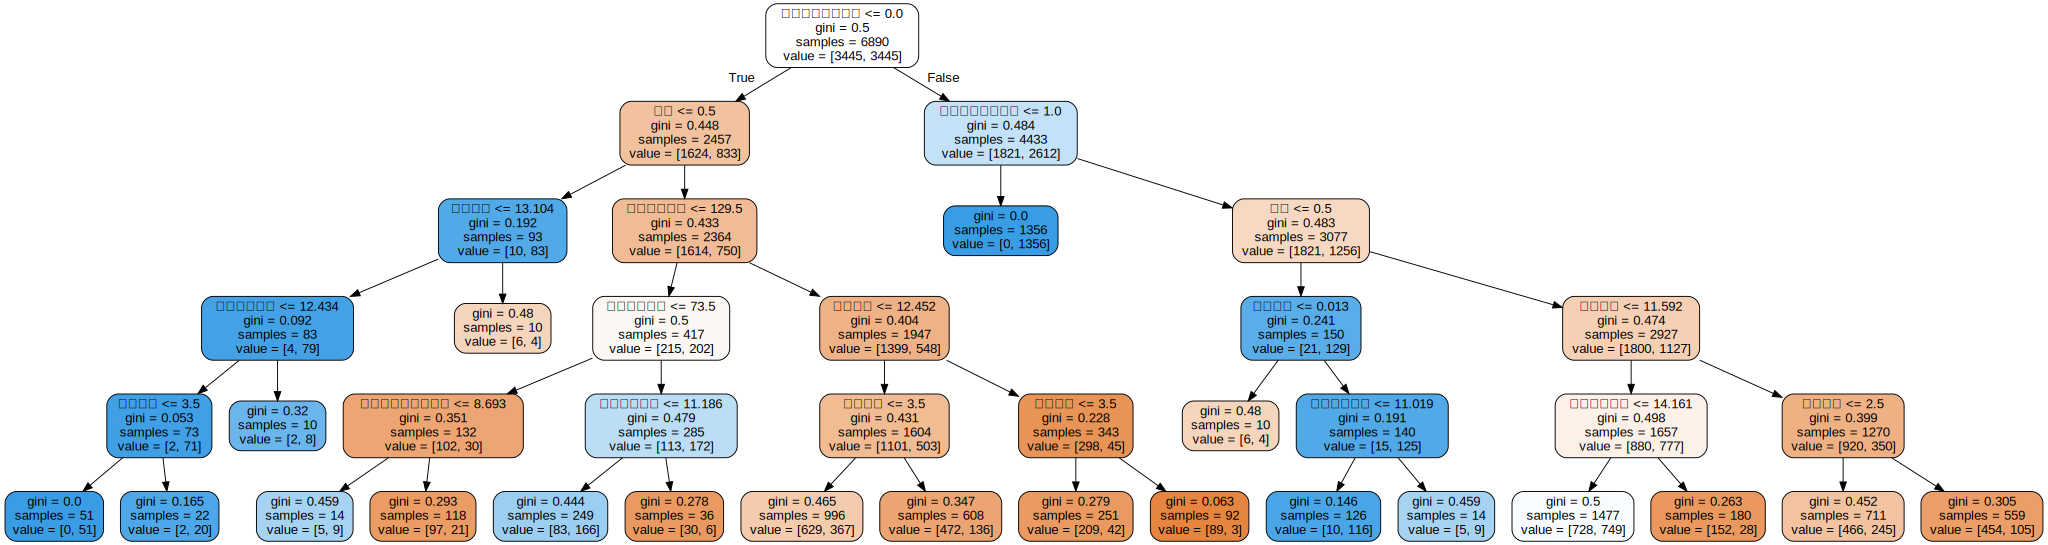

In [77]:
import graphviz
from sklearn import tree
#首先配置
dot_data = tree.export_graphviz( dtc #要对已经建成的dct这个实例化好的模型进行画图
                                ,feature_names= x.columns #更改列名为中文
                    #            ,class_names=[] #更改标签名字
                                ,filled=True #给每一个节点分配颜色,颜色约深表示叶子的纯度越高
                                ,rounded=True #节点性状为圆角
                                  )
graph = graphviz.Source(dot_data)
graph

# 随机森林

In [78]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import GridSearchCV

In [79]:
rfc = RFC(n_estimators=200,random_state=90).fit(over_samples_x_train,over_samples_y_train)
score_pre = cvs(rfc,over_samples_x_train,over_samples_y_train,cv=5, scoring='f1').mean()
score_pre
#print(classification_report(y_train,rfc.predict(x_train)))
print(classification_report(over_samples_y_train,rfc.predict(over_samples_x_train)))
print(classification_report(over_samples_y_test,rfc.predict(over_samples_x_test)))

0.8429840630249139

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3445
           1       1.00      1.00      1.00       569

    accuracy                           1.00      4014
   macro avg       1.00      1.00      1.00      4014
weighted avg       1.00      1.00      1.00      4014

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3445
           1       1.00      1.00      1.00      3445

    accuracy                           1.00      6890
   macro avg       1.00      1.00      1.00      6890
weighted avg       1.00      1.00      1.00      6890

              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1454
           1       0.89      0.58      0.70      1454

    accuracy                           0.75      2908
   macro avg       0.79      0.75      0.75      2908
weighted avg       0.79      0.75      0.75      2908



In [ ]:
for i in range(0,200,10):
    i

'\n在这⾥我们选择学习曲线，可以使⽤⽹格搜索吗？可以，但是只有学习曲线，才能看⻅趋势\n我个⼈的倾向是，要看⻅n_estimators在什么取值开始变得平稳，是否⼀直推动模型整体准确率的上升等\n信息\n第⼀次的学习曲线，可以先⽤来帮助我们划定范围，我们取每⼗个数作为⼀个阶段，来观察n_estimators\n的变化如何引起模型整体准确率的变化\n'

最⾼score: 0.8433495577693615
最优n_estimators: 191


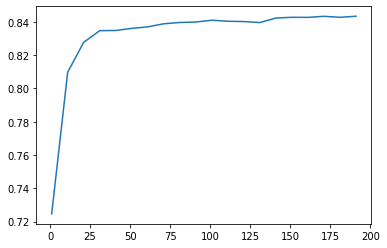

In [81]:
'''
在这⾥我们选择学习曲线，可以使⽤⽹格搜索吗？可以，但是只有学习曲线，才能看⻅趋势
我个⼈的倾向是，要看⻅n_estimators在什么取值开始变得平稳，是否⼀直推动模型整体准确率的上升等
信息
第⼀次的学习曲线，可以先⽤来帮助我们划定范围，我们取每⼗个数作为⼀个阶段，来观察n_estimators
的变化如何引起模型整体准确率的变化
'''

scorel = []
for i in range(0,200,10):
    rfc = RFC(n_estimators=i+1,
                                 n_jobs=-1,
                                 random_state=90)
    score = cvs(rfc,over_samples_x_train, over_samples_y_train,cv=5, scoring='f1').mean()
    scorel.append(score)

print('最⾼score:',max(scorel))
print('最优n_estimators:',(scorel.index(max(scorel))*10)+1)
#plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

In [ ]:
# scorel = []
# for i in range(190,300,10):
#     rfc = RandomForestClassifier(n_estimators=i,
#     n_jobs=-1,
#     random_state=90)
#     score = cvs(rfc,over_samples_x_train, over_samples_y_train,cv=5, scoring='f1').mean()
#     scorel.append(score)
# print(max(scorel),([*range(190,300)][scorel.index(max(scorel))]))

In [ ]:
#plt.figure(figsize=[20,5])
# plt.plot(range(190,300,10),scorel)
# plt.show()

In [ ]:
# 数量越多 分数越高 但是提升不大，所以就选200

In [ ]:
"""
有⼀些参数是没有参照的，很难说清⼀个范围，这种情况下我们使⽤学习曲线，看趋势
从曲线跑出的结果中选取⼀个更⼩的区间，再跑曲线
param_grid = {'n_estimators':np.arange(0, 200, 10)}
param_grid = {'max_depth':np.arange(1, 20, 1)}
param_grid = {'max_leaf_nodes':np.arange(25,50,1)}
对于⼤型数据集，可以尝试从1000来构建，先输⼊1000，每100个为⼀个区间，再逐渐缩⼩范围
有⼀些参数是可以找到⼀个范围的，或者说我们知道他们的取值和随着他们的取值，模型的整体准确率会如
何变化，这样的参数我们就可以直接跑⽹格搜索
param_grid = {'criterion':['gini', 'entropy']}
param_grid = {'min_samples_split':np.arange(2, 2+20, 1)}
param_grid = {'min_samples_leaf':np.arange(1, 1+10, 1)}
param_grid = {'max_features':np.arange(5,30,1)}
"""

In [82]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
# ⼀般根据数据的⼤⼩来进⾏⼀个试探，乳腺癌数据很⼩，所以可以采⽤1~10，或者1~20这样的试探
# 但对于像digit recognition那样的⼤型数据来说，我们应该尝试30~50层深度（或许还不⾜够
# 更应该画出学习曲线，来观察深度对模型的影响
rfc = RFC(n_estimators=150,random_state=90, n_jobs=-1)
GS = GridSearchCV(rfc,param_grid,cv=5, scoring='f1')
GS.fit(over_samples_x, over_samples_y)
GS.best_params_
GS.best_score_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=-1,
                                              oob_score=False, random_state=90,
                                    

{'max_depth': 19}

0.8274356481922205

In [ ]:
GridSearchCV?

In [84]:
#调整max_features
param_grid = {'max_features':np.arange(5,12,1)}
"""
max_features是唯⼀⼀个即能够将模型往左（低⽅差⾼偏差）推，也能够将模型往右（⾼⽅差低偏差）推
的参数。我们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将
max_features往哪边调。现在模型位于图像左侧，我们需要的是更⾼的复杂度，因此我们应该把
max_features往更⼤的⽅向调整，可⽤的特征越多，模型才会越复杂。max_features的默认最⼩值是
sqrt(n_features)，因此我们使⽤这个值作为调参范围的最⼩值。
"""
rfc = RFC(n_estimators=150,random_state=90)
GS = GridSearchCV(rfc,param_grid,cv=5, scoring='f1')
GS.fit(over_samples_x_train, over_samples_y_train)
GS.best_params_
GS.best_score_

'\nmax_features是唯⼀⼀个即能够将模型往左（低⽅差⾼偏差）推，也能够将模型往右（⾼⽅差低偏差）推\n的参数。我们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将\nmax_features往哪边调。现在模型位于图像左侧，我们需要的是更⾼的复杂度，因此我们应该把\nmax_features往更⼤的⽅向调整，可⽤的特征越多，模型才会越复杂。max_features的默认最⼩值是\nsqrt(n_features)，因此我们使⽤这个值作为调参范围的最⼩值。\n'

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=None,
                                              oob_score=False, random_state=90,
                                  

{'max_features': 6}

0.8449510789812068

In [85]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}
#对于min_samples_split和min_samples_leaf,⼀般是从他们的最⼩值开始向上增加10或20
#⾯对⾼维度⾼样本量数据，如果不放⼼，也可以直接+50，对于⼤型数据，可能需要200~300的范围
#如果调整的时候发现准确率⽆论如何都上不来，那可以放⼼⼤胆调⼀个很⼤的数据，⼤⼒限制模型的复杂
#度
rfc = RFC(n_estimators=150,random_state=90, n_jobs=-1)
GS = GridSearchCV(rfc,param_grid,cv=5, scoring='f1')
GS.fit(over_samples_x_train, over_samples_y_train)
GS.best_params_
GS.best_score_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=-1,
                                              oob_score=False, random_state=90,
                                    

{'min_samples_leaf': 1}

0.8415850321705683

In [86]:
# 调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RFC(n_estimators=150,random_state=90, n_jobs=-1)
GS = GridSearchCV(rfc,param_grid,cv=5, scoring='f1')
GS.fit(over_samples_x_train, over_samples_y_train)
GS.best_params_
GS.best_score_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=-1,
                                              oob_score=False, random_state=90,
                                    

{'min_samples_split': 2}

0.8415850321705683

In [87]:
#调整Criterion
param_grid = {'criterion':['gini', 'entropy']}
rfc = RFC(n_estimators=150,random_state=90, n_jobs=-1)
GS = GridSearchCV(rfc,param_grid,cv=5, scoring='f1')
GS.fit(over_samples_x_train, over_samples_y_train)
GS.best_params_
GS.best_score_

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=150, n_jobs=-1,
                                              oob_score=False, random_state=90,
                                    

{'criterion': 'entropy'}

0.8416553782456979

In [101]:
rfc = RFC(n_estimators=150,criterion='entropy', max_depth=6, max_features=6, class_weight='balanced',
          min_samples_leaf=1, min_samples_split=2,random_state=90).fit(over_samples_x_train, over_samples_y_train)
score_pre = cvs(rfc,over_samples_x_train,over_samples_y_train,cv=5, scoring='f1').mean()
score_pre 
#print(classification_report(y_test,rfc.predict(x_test)))
print(classification_report(over_samples_y_train,rfc.predict(over_samples_x_train)))
print(classification_report(over_samples_y_test,rfc.predict(over_samples_x_test)))

0.7155282968977138

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1454
           1       0.28      0.26      0.27       267

    accuracy                           0.78      1721
   macro avg       0.57      0.57      0.57      1721
weighted avg       0.77      0.78      0.78      1721

              precision    recall  f1-score   support

           0       0.73      0.88      0.80      3445
           1       0.85      0.67      0.75      3445

    accuracy                           0.78      6890
   macro avg       0.79      0.78      0.77      6890
weighted avg       0.79      0.78      0.77      6890

              precision    recall  f1-score   support

           0       0.70      0.88      0.78      1454
           1       0.84      0.63      0.72      1454

    accuracy                           0.75      2908
   macro avg       0.77      0.75      0.75      2908
weighted avg       0.77      0.75      0.75      2908



In [ ]:
# 随机森林网格搜索调参后效果与原先差不多，甚至还降低了，于是我通过设置max_depth进行减枝